In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ___Examining the Data___
-----------------

In [2]:
# Before applying any machine learning models to any dataset, it is a good practice to rxploratively examine the dataset.
# Just by scrolling through the dataset or by making simple exploratory visualizations.

## ___&rarr; Inspections may reveal the need for cleaning & preprocessing___

In [3]:
# Identifying and removing outliers, missing values, incorrect encodings, misspellings and things of similar sorts.

In [4]:
# During exploration, we might be able to recognize missing/noisy data, inconsisietnces, wrong data types being used in columns,
# parsing errors, use of incorrect units of measurement.

In [ ]:
# e.g.
# First name & last name being concatenated in the same column.
# Dates being recored in different formats -> dd/mm/yyyy, mm/dd/yyyy, yy/mm/dd, dddd,mm,yyyy etc...
# Weights being recorded in both kilograms and pounds.

In [5]:
# You may even discover that the problem at hand doesn't even need a machine learning solution.

In [1]:
# We can use sklearn's train_test_split function to partition the dataset.
# We'll use the training set for feature analysis and visualizations.
# The test set will only be used for evaluating model performance.

In [3]:
# Visualizations help us easily identify outliers, anomalies, missing features, presence of clusters etc..
# A feature space refers to a virtual space of features of objects in different dimensions.

# for example we can have a 3 dimensional feature space (x - weight, y - sugar content & z - diameter)
# in this feature space, we can represent fruits as markers
# Such representation makes it so intuitive to identify clusters.

In [4]:
fruits = pd.read_table(r"../resources/assets/fruit_data_with_colors.txt", delimiter = "\t")

In [5]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

## ___Preliminary visualizations___
--------------

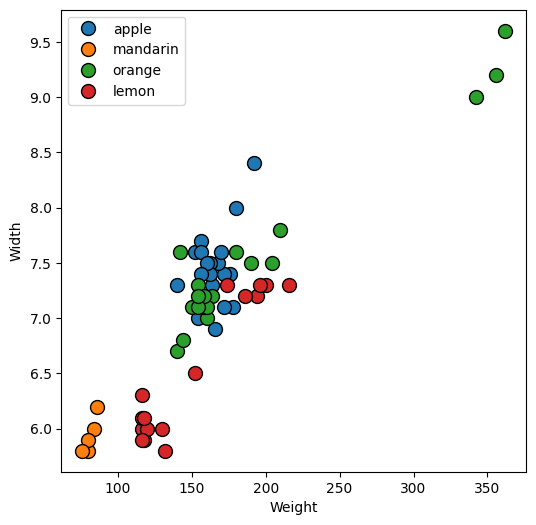

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
for frt in fruits.fruit_name.unique():
    _fruit = fruits.query("fruit_name == @frt")
    axes.plot(_fruit.mass, _fruit.width, linestyle = "none", marker = "o", mec = "black", ms = 10, label = frt)
axes.set_xlabel("Weight")
axes.set_ylabel("Width")
axes.legend()
plt.show()

In [15]:
# There are some isolated clusters, particularly mandarins form a unique cluster based on weight and width.
# There are also mixtures where the different types of fruits have more/less similar features.

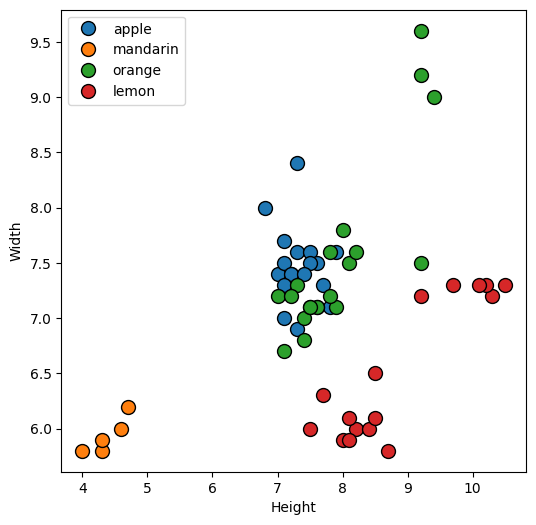

In [17]:
fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
for frt in fruits.fruit_name.unique():
    _fruit = fruits.query("fruit_name == @frt")
    axes.plot(_fruit.height, _fruit.width, linestyle = "none", marker = "o", mec = "black", ms = 10, label = frt)
axes.set_xlabel("Height")
axes.set_ylabel("Width")
axes.legend()
plt.show()

In [18]:
# Here mandarins and lemons form fairly distinct clusters.
# But apples and oranges do intermingle as before.

In [30]:
np.array(np.round(fruits.mass), dtype = np.int64)

array([192, 180, 176,  86,  84,  80,  80,  76, 178, 172, 166, 172, 154,
       164, 152, 156, 156, 168, 162, 162, 160, 156, 140, 170, 342, 356,
       362, 204, 140, 160, 158, 210, 164, 190, 142, 150, 160, 154, 158,
       144, 154, 180, 154, 194, 200, 186, 216, 196, 174, 132, 130, 116,
       118, 120, 116, 116, 116, 152, 118], dtype=int64)

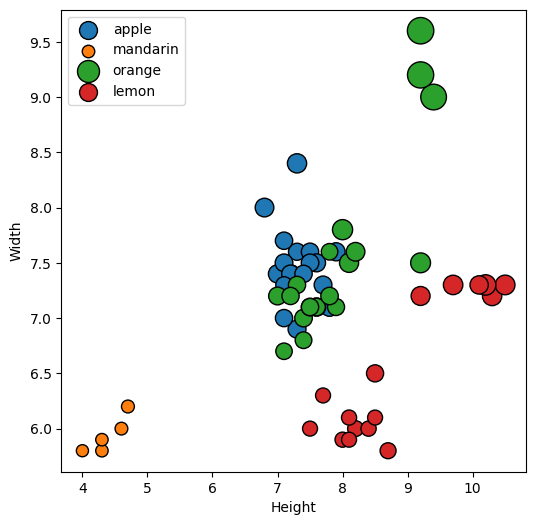

In [37]:
# Let's encode all these 3 variables.
# Encoding the weight of fruits in marker size

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
for frt in fruits.fruit_name.unique():
    _fruit = fruits.query("fruit_name == @frt")
    msize = np.array(np.round(_fruit.mass), dtype = np.int64)
    axes.scatter(_fruit.height, _fruit.width, marker = "o", s = msize, label = frt, edgecolors = "black")
axes.set_xlabel("Height")
axes.set_ylabel("Width")
axes.legend()
plt.show()

## ___Fruits in a 3D feature space___

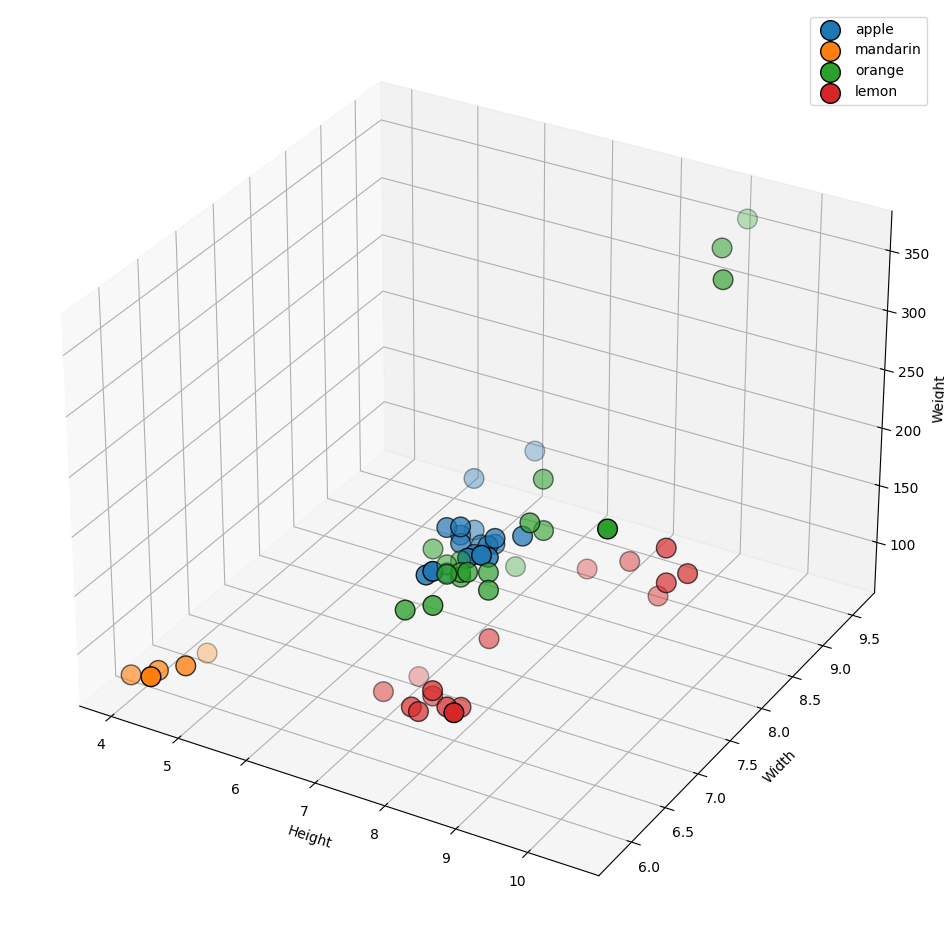

In [63]:
fig = plt.figure(figsize = (12, 12))
axes = fig.add_subplot(projection = "3d")

for frt in fruits.fruit_name.unique():
    _fruit = fruits.query("fruit_name == @frt")
    axes.scatter3D(_fruit.height, _fruit.width, _fruit.mass, marker = "o", s = 200, label = frt, edgecolors = "black")
    
axes.set_xlabel("Height")
axes.set_ylabel("Width")
axes.set_zlabel("Weight")
axes.legend()
plt.show()